# Generative model on HSMusic

In [1]:
 %load_ext autoreload
%autoreload 2
from vae import *
import sys
sys.path.append('../')
import hsmusic
import numpy as np
from tqdm import tqdm
import autopandas as apd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
def show(example):
    for i in range(1):
        a = example[:,:,i]
        a = a.reshape(100, 78)
        plt.imshow(a)

In [36]:
sequence_length = 100
data = hsmusic.get_data('mozart', 100)
data = crop_data_bis(data, sequence_length=sequence_length)
n = data.shape[0]
print(data.shape)

Reading midi files...


100%|██████████| 100/100 [01:25<00:00,  1.17it/s]

(65, 100, 78, 2)


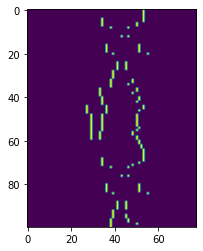

In [34]:
show(data[6])

# Fully connected architecture

In [13]:
# Reshape data
data_reshaped = np.reshape(data, (n, sequence_length*78*2))

model = apd.generators.VAE(input_dim=(sequence_length* 78 * 2), layers=[], latent_dim=6, loss='binary_crossentropy', architecture='fully', optimizer='adam')
vae, encoder, decoder = model.autoencoder, model.encoder, model.decoder
#print(vae.summary())
model.fit(data_reshaped, epochs=40)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 3 samples
Epoch 1/40
3/3 [==============================] - 1s 421ms/sample - loss: 0.9314
Epoch 2/40
3/3 [==============================] - 0s 1ms/sample - loss: 0.8449
Epoch 3/40
3/3 [==============================] - 0s 2ms/sample - loss: 0.7860
Epoch 4/40
3/3 [==============================] - 0s 4ms/sample - loss: 0.8040
Epoch 5/40
3/3 [==============================] - 0s 3ms/sample - loss: 0.8121
Epoch 6/40
3/3 [==============================] - 0s 1ms/sample - loss: 0.7666
Epoch 7/40
3/3 [==============================] - 0s 1ms/sample - loss: 0.7309
Epoch 8/40
3/3 [==============================] - 0s 4ms/sample - loss: 0.7324
Epoch 9/40
3/3 [==============================] - 0s 2ms/sample - loss: 0.7458
Epoch 10/40
3/3 [==============================] - 0s 2ms/sample - loss: 0.7432
Epoch 11/40
3/3 [==============================] - 0s 1ms/sample - loss: 0.7268
Epoch 12/40
3/3 [==========

In [14]:
# generate output
s = np.array(model.sample(1))
s = binarize(s)
s = np.reshape(s, (100, 78, 2))

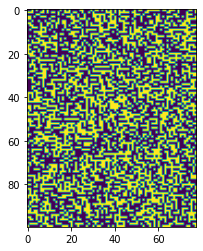

In [33]:
show(s)

In [59]:
# save
hsmusic.to_midi(s, 'out.mid')

# CNN architecture

In [37]:
sdata = simplify_data(data)

In [38]:
sdata = np.reshape(sdata, (n, sequence_length, 78, 1))

In [48]:
model = apd.generators.VAE(input_dim=(sequence_length, 78, 1), layers=[], latent_dim=6, loss='binary_crossentropy', architecture='cnn', optimizer='adam')
vae, encoder, decoder = model.autoencoder, model.encoder, model.decoder
#print(vae.summary())
model.fit(sdata, epochs=100)

/usr/local/lib/python3.6/dist-packages/autopandas/generators/vae.py:103: UserWarning: strides argument is currently not implemented.
  warn('strides argument is currently not implemented.')


Train on 65 samples
Epoch 1/100
65/65 [==============================] - 1s 8ms/sample - loss: 0.9700
Epoch 2/100
65/65 [==============================] - 0s 384us/sample - loss: 0.8746
Epoch 3/100
65/65 [==============================] - 0s 369us/sample - loss: 0.7801
Epoch 4/100
65/65 [==============================] - 0s 464us/sample - loss: 0.7677
Epoch 5/100
65/65 [==============================] - 0s 322us/sample - loss: 0.7622
Epoch 6/100
65/65 [==============================] - 0s 392us/sample - loss: 0.7482
Epoch 7/100
65/65 [==============================] - 0s 320us/sample - loss: 0.7445
Epoch 8/100
65/65 [==============================] - 0s 414us/sample - loss: 0.7620
Epoch 9/100
65/65 [==============================] - 0s 373us/sample - loss: 0.7748
Epoch 10/100
65/65 [==============================] - 0s 333us/sample - loss: 0.7609
Epoch 11/100
65/65 [==============================] - 0s 366us/sample - loss: 0.7493
Epoch 12/100
65/65 [==============================] - 0s

65/65 [==============================] - 0s 429us/sample - loss: 0.3078
Epoch 98/100
65/65 [==============================] - 0s 306us/sample - loss: 0.3530
Epoch 99/100
65/65 [==============================] - 0s 348us/sample - loss: 0.3722
Epoch 100/100
65/65 [==============================] - 0s 312us/sample - loss: 0.3671


In [49]:
s = model.sample(1)
s = binarize(s)
s = np.reshape(s, (100, 78, 1))
zeros = np.zeros((100, 78, 1))
s = np.concatenate([s, zeros], axis=2)

/usr/local/lib/python3.6/dist-packages/autopandas/generators/autoencoder.py:188: UserWarning: Impossible to cast sampled data to autopandas.AutoData
  warn('Impossible to cast sampled data to autopandas.AutoData')


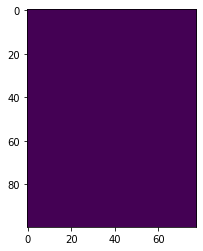

In [50]:
show(s)

In [46]:
hsmusic.to_midi(s, 'out2.mid')